<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/py_PDE_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Tutorial 1 : Grids and Fields *

In [9]:
!pip install py-pde

     |████████████████████████████████| 276kB 2.5MB/s 


In [10]:
from pde import DiffusionPDE, UnitGrid, ScalarField

In [12]:
!pip install h5py pandas pyfftw tqdm

     |████████████████████████████████| 2.6MB 4.7MB/s 


In [13]:
from pde import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

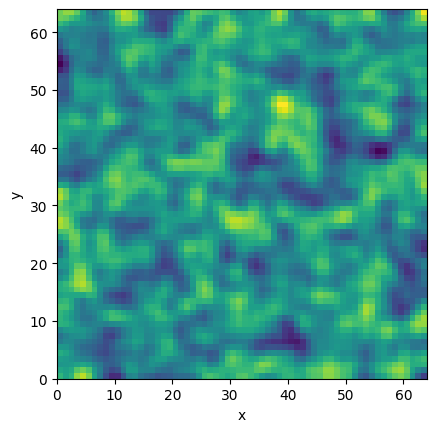

In [17]:
plt.style.use('default')
eq = DiffusionPDE(diffusivity=0.1)                  # define the pde
grid = UnitGrid([64, 64])                           # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

result = eq.solve(state, t_range=10)
result.plot()

In [19]:
result.data.shape

(64, 64)

In [23]:
# plt.plot(result.data[0], result.data[1])
# plt.show()

#Showing the Dynamic Diffusion History.

Output()

t=0, c=0.25±0.03
t=0.1, c=0.25±0.0193
t=0.2, c=0.25±0.0147
t=0.3, c=0.25±0.0122
t=6.8, c=0.25±0.00215


Spent more time on handling trackers (1.8750587839999966) than on the actual simulation (0.9911026020000016)


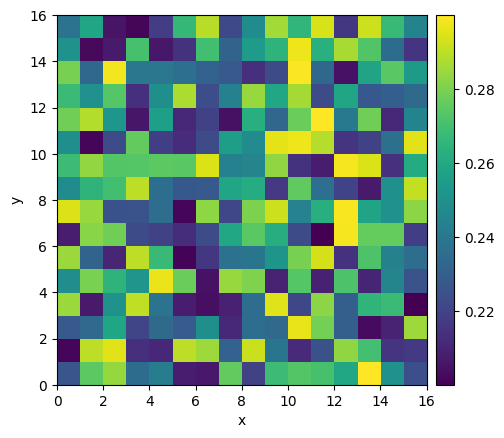

In [28]:
eq = DiffusionPDE()                                 # define the pde
grid = UnitGrid([16, 16])                           # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

storage = MemoryStorage()

trackers = [
    'progress',                    # show progress bar during simulation
    'steady_state',                # abort when steady state is reached
    storage.tracker(interval=1),   # store data every simulation time unit
    PlotTracker(show=True),        # show images during simulation
    # print some output every 5 real seconds:
    PrintTracker(interval=RealtimeIntervals(duration=5))

]

eq.solve(state, 10, dt=0.1, tracker=trackers)

storage[0].plot(colorbar=True)

#Setting a Boundary Condition.

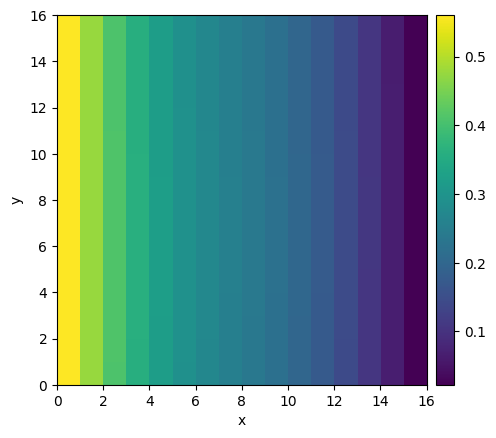

In [27]:
grid = UnitGrid([16, 16], periodic=[False, True])   # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

# set boundary conditions `bc` for all axes
bc_x_left = {'type': 'derivative', 'value': 0.1}
bc_x_right = {'type': 'value', 'value': 0}
bc_x = [bc_x_left, bc_x_right]
bc_y = 'periodic'
eq = DiffusionPDE(bc=[bc_x, bc_y])

result = eq.solve(state, t_range=10, dt=0.005)
result.plot(colorbar=True)

# Making a movie.

In [31]:
eq = DiffusionPDE()                                 # define the physics
grid = UnitGrid([16, 16])                           # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

storage = MemoryStorage()               # create storage
tracker = storage.tracker(interval=1)   # create associated tracker

eq.solve(state, t_range=2, dt=0.005, tracker=tracker)

# create movie from stored data
movie_scalar(storage, '/tmp/diffusion.mov')

Output()

In [32]:
#Practicing...

In [34]:
grid = UnitGrid([32,32])

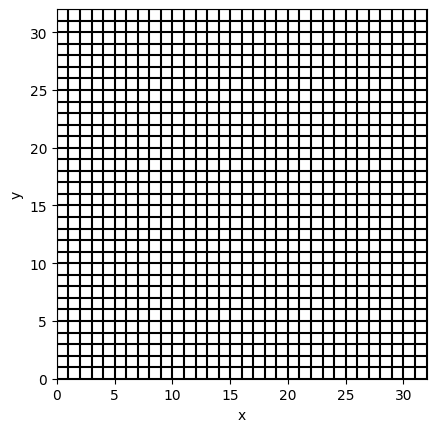

In [35]:
grid.plot()

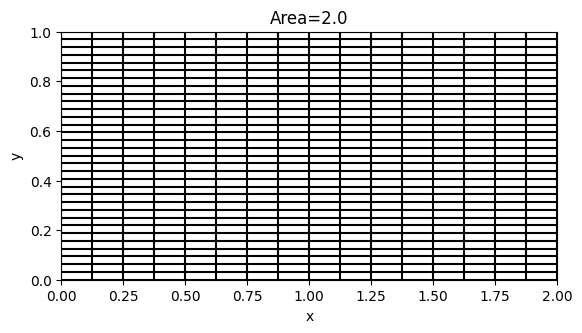

In [37]:
grid = CartesianGrid([[0, 2], [0, 1]], [16, 32])
grid.plot(title=f'Area={grid.volume}')

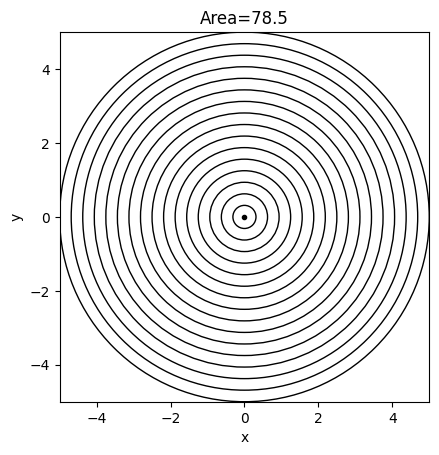

In [38]:

grid = PolarGrid(5, 16)
grid.plot(title=f'Area={grid.volume:.3g}')

#ScalarFields

Scalar fields represent scalar quantities that depend on position. In this package, scalar fields are represented by their values at the support points of the discretized grids discussed above. Consequently, one first has to construct a grid and pass it to the ScalarField class to construct a scalar field.

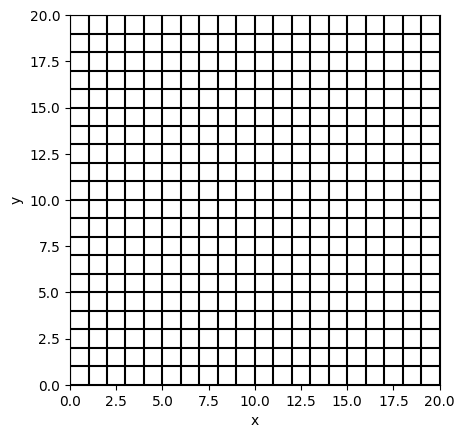

In [39]:
grid = UnitGrid([20,20])
grid.plot()

In [44]:
P = np.ones([20,20])
P = P*2000

In [46]:
# P is now the initial Pressure value containing scalar field. 

In [47]:
field = ScalarField(grid=grid , data = P)

In [50]:
import pandas as pd


In [51]:
df = pd.DataFrame(field.data)

In [52]:
df #just to display the various pressure values in each grid block.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
2,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
3,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
4,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
5,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
6,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
7,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
8,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
9,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0


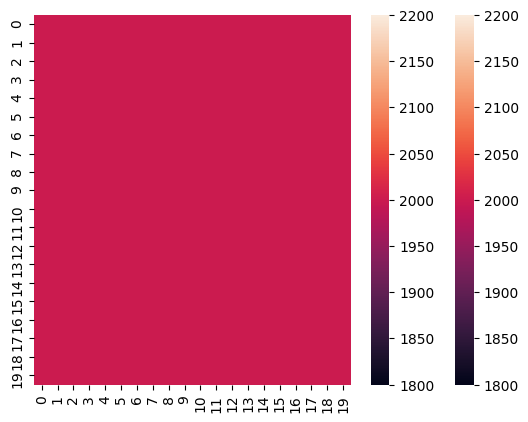

In [55]:
import seaborn as sns
sns.heatmap(df)
plt.show()

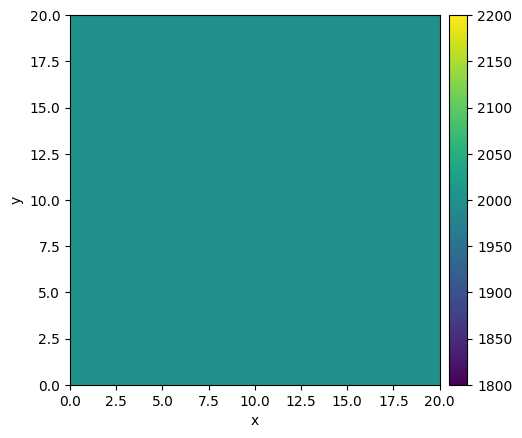

In [56]:
#or simply
field.plot(colorbar=True)

#Values at individual points can be determined by interpolation

#Initializing with a random normal distribution.

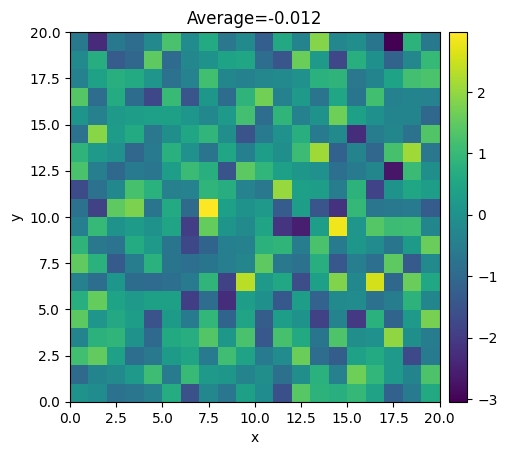

In [60]:

field = ScalarField.random_normal(grid)
field.plot(title=f'Average={field.average:.3f}', colorbar=True);



# **Tutorial 2 : Solving Pre-Defined PDEs **

In the simplest case, a PDE evolves a field in time. To reflect this in code, we first define an initial state and then use a simple PDE to evolve it in time

In [79]:
DiffusionPDE?

$ \frac {\partial P} {\partial t} =  \eta \nabla^2 P $

In [85]:
P[:,0] = 150

P

array([[ 150., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 150., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 150., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 150., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 150., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 150., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 1

In [86]:
eq = DiffusionPDE(diffusivity=0.1)

In [87]:
grid = UnitGrid([20,20])

In [88]:
state_i = ScalarField(grid=grid , data = P)

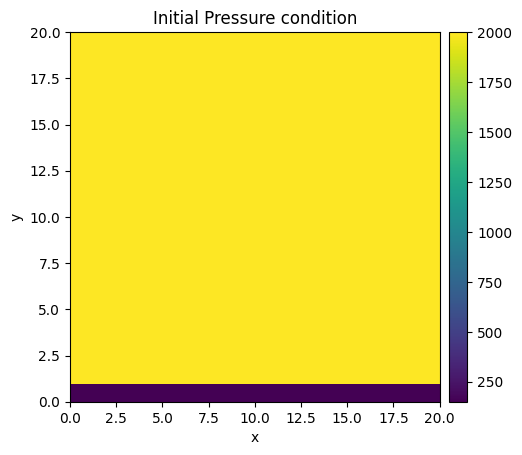

In [89]:
state_i.plot(title='Initial Pressure condition', colorbar=True )

In [90]:
result = eq.solve(state_i , t_range= 10 , dt = 0.0001)

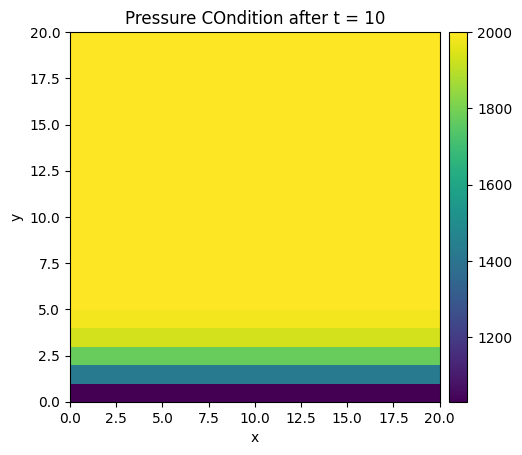

In [91]:
result.plot(title='Pressure COndition after t = 10' , colorbar=True)

##Example 2 :

In [92]:
g = UnitGrid([50,50])

In [93]:
eq = DiffusionPDE()

In [99]:
ScalarField.from_expression?

In [102]:
# i_state = from_expression(grid = g , expression = 'exp(-(x**2 + y**2) * 100)')

# i_state.plot(title='Initial state')